In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.columns #checking the available columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.dtypes #checking the data type of each column

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape #checking the shape of dataframe

(614, 13)

In [ ]:
train['Loan_Status'].value_counts() #give the distribution of values

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train['Loan_Status'].value_counts(normalize=True) #setting normalize true give proportions instead of numbers

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

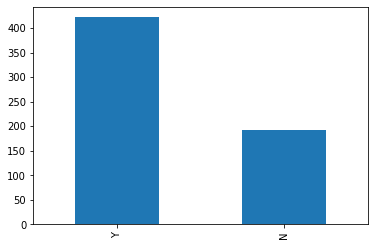

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

In [ ]:
train.isnull().sum() #gives the number of missing values in each columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

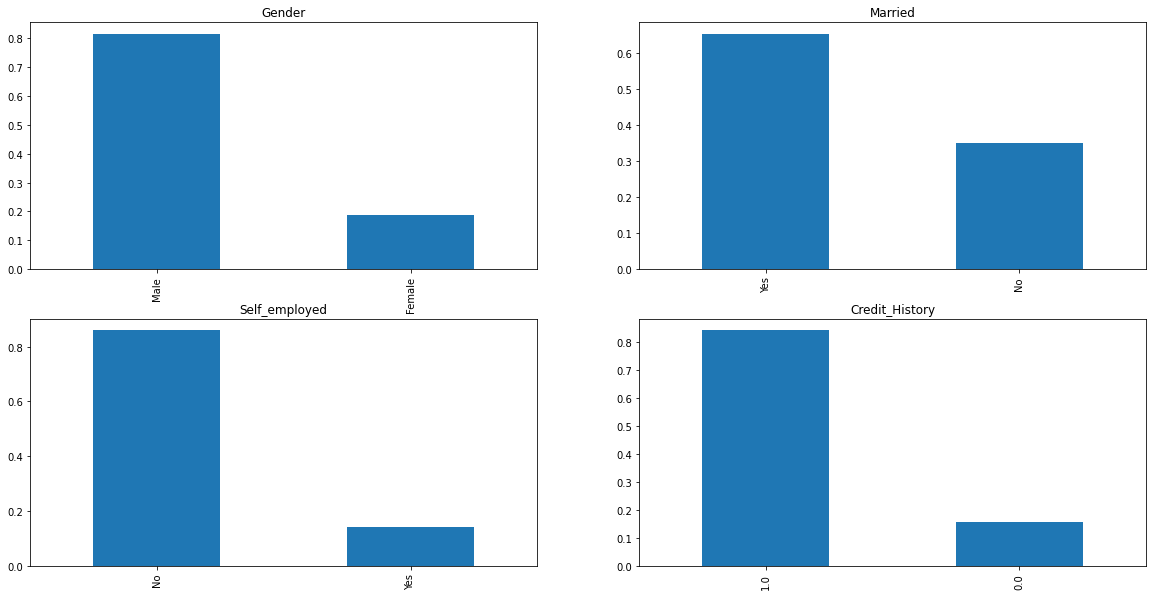

In [ ]:
#Categorical Variable
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')



*   80 percent are Males
*   65 percent are Married
*   85 percent are Not Self Employed
*   90 percent have paid their loan back





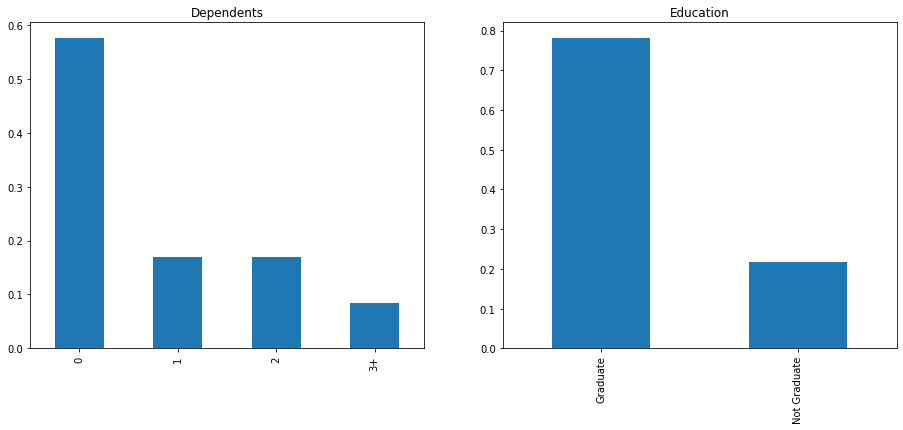

In [ ]:
#Ordinal Variable
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

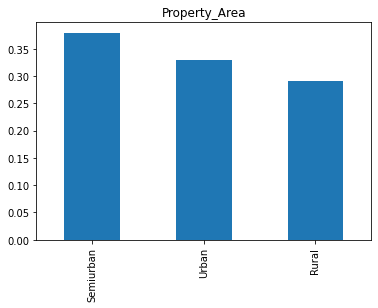

In [ ]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

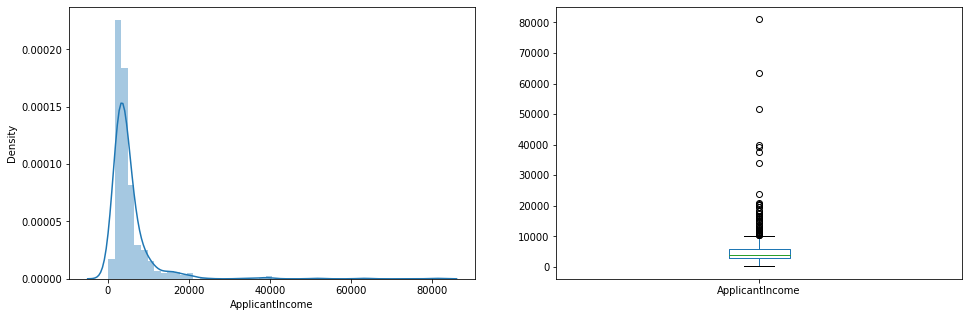

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**this shows how income is sweked to left hand side, showing most of income is on lower level**

**Box plot shows the huge number of outliers that are present in the data**

Text(0.5, 0.98, '')

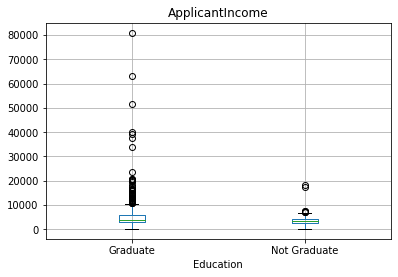

In [ ]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

***Above Box plot shows the presence of outliers for Graduates***

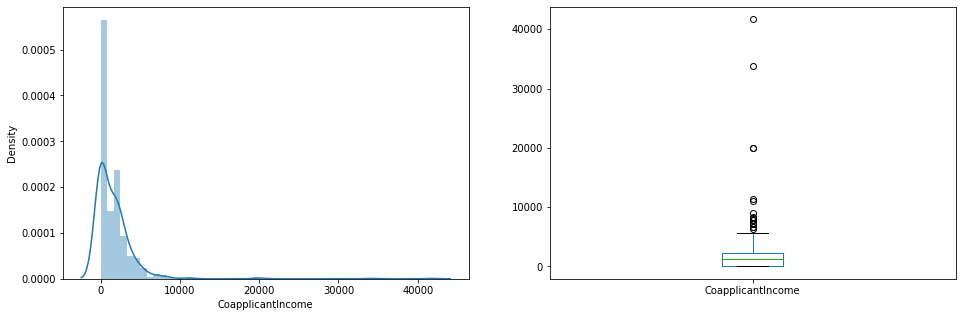

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

***Above distribution chart shows, how the income of co applicants is majorly less than 5000 and close to zero***

***Similarly box plot shows present of outliers in the data***

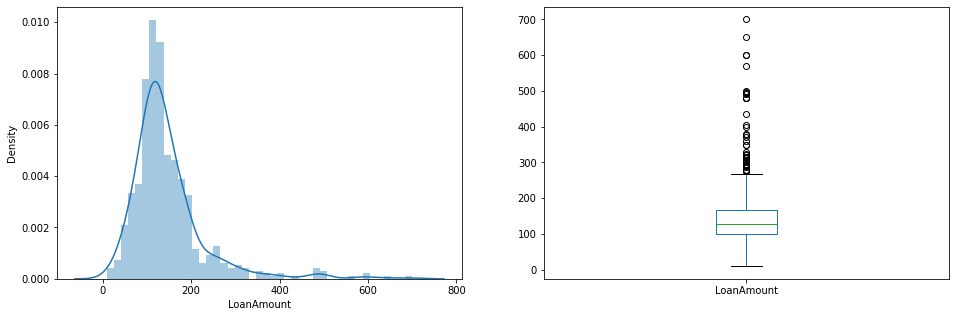

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

**Hypothesis that were discussed earlier**

1.   People with higher income should get loan
2.   People with good repay history should get loan
3.   Lesser Loan amount should be easily approved
2.   Lower the EMI, higher chances of approval





In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

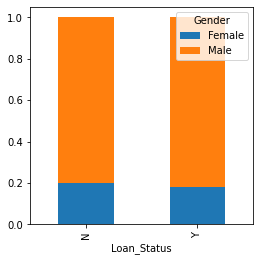

In [ ]:
#Cross tab to see the loan status by gender
gender = pd.crosstab(train['Loan_Status'],train['Gender'])
gender.div(gender.sum(1).astype(float),axis=0).plot.bar(stacked='True',figsize=(4,4))

***This shows that Loan status is independent of gender***

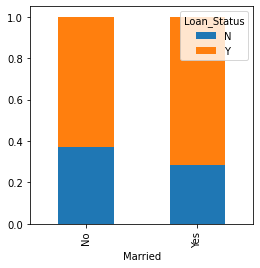

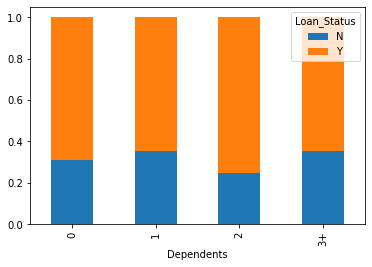

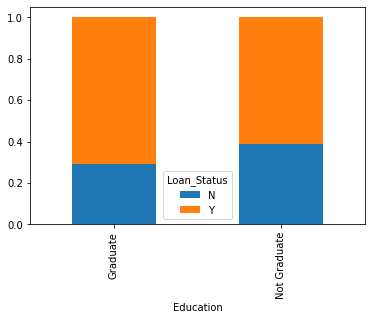

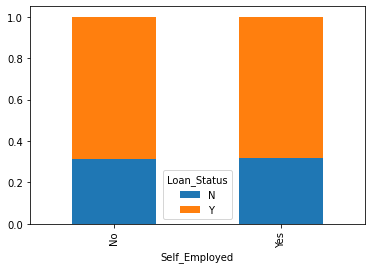

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked='True',figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot.bar(stacked='True')
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot.bar(stacked='True')
plt.show()
Self_employed.div(Self_employed.sum(1).astype(float),axis=0).plot.bar(stacked='True')
plt.show()

***Married People has slighlty better chances of getting loan approved***

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

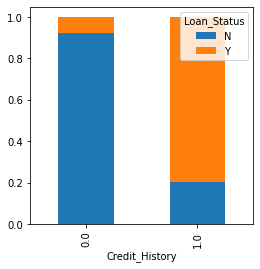

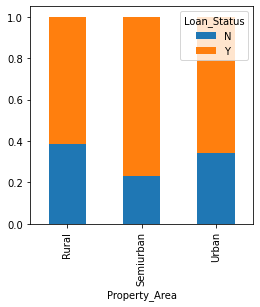

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

***Proportion of Single People getting Loan is higher*** \\n
***People in Semi Urban has higher probability of getting loan***

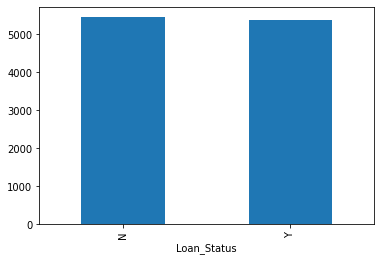

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

**Mean doesn't shows any impact on the Loan Status**

In [ ]:
bins = [00,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
train['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very High
612    Very High
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

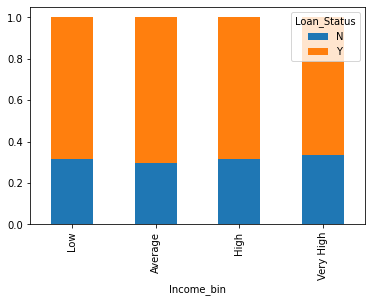

In [ ]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot.bar(stacked='True')

**This proves that Applicant's income does not have effect on Loan approval,which is contradictory to our hypothesis**

In [ ]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']

train['Coapplicant_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

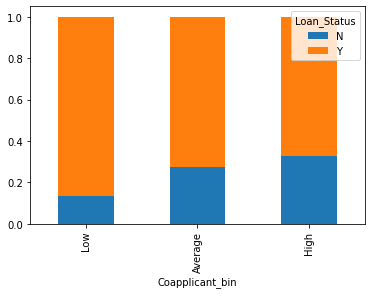

In [ ]:
Coapplicant_bin = pd.crosstab(train['Coapplicant_bin'],train['Loan_Status'])
Coapplicant_bin.div(Coapplicant_bin.sum(1).astype(float),axis=0).plot.bar(stacked = 'True')

**From Above Analysis, it looks as if people with Low applicant income, have higher chances of getting Loan**

*However that doesn't looks correct*

In [ ]:
train['CoapplicantIncome'].value_counts().sort_values(ascending=False)

0.0       273
1666.0      5
2083.0      5
2500.0      5
1625.0      3
         ... 
6666.0      1
2188.0      1
1915.0      1
1811.0      1
2100.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

***If you see out of 600 records, 273 records has zero Coapplicant Income**

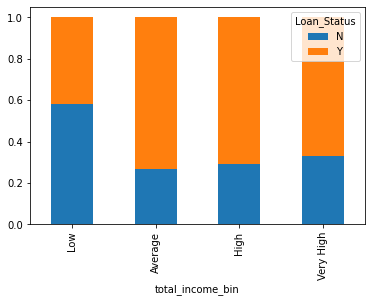

In [ ]:
train['total_income'] = train['CoapplicantIncome'] + train['ApplicantIncome']

bins = [0,2500,4000,6000,81000]
labels = ['Low','Average','High','Very High']

train['total_income_bin'] = pd.cut(train['total_income'],bins,labels = labels)

total_income_bin = pd.crosstab(train['total_income_bin'],train['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)                               

***People with Low total combined income, has lesser loan acceptance rate***

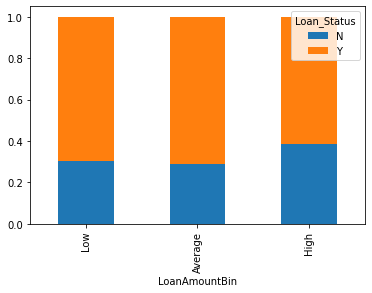

In [ ]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmountBin'] = pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmountBin = pd.crosstab(train['LoanAmountBin'],train['Loan_Status'])
LoanAmountBin.div(LoanAmountBin.sum(1).astype(float),axis=0).plot.bar(stacked='True')

***Low Loan Amount tends to get easier approval***

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_bin', 'total_income', 'total_income_bin',
       'LoanAmountBin'],
      dtype='object')

In [ ]:
train = train.drop(['Income_bin','Coapplicant_bin','total_income_bin','LoanAmountBin'],axis=1)

In [ ]:
train = train.drop(['total_income'],axis=1)

In [ ]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

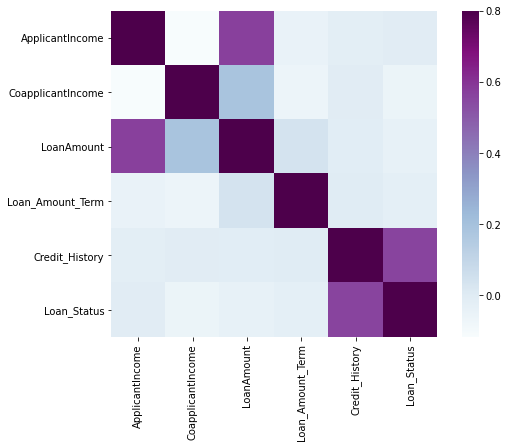

In [ ]:
matrix = train.corr()
ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

***Loan Amount and Applicant Income are corelated || Loan Status and Credit history are corelated***

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#since the number of values in Gender is very lesser,
#plus the effect of gender on loan status is not much, we can fill it with Mode

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [ ]:
#similary fo married, dependents, self_employed, and credit_history

train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#similary fo married, dependents, self_employed, and credit_history

test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)


In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

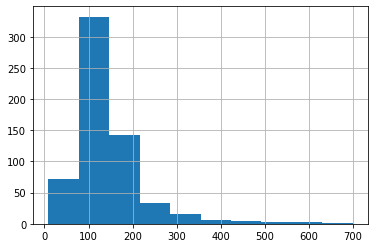

In [ ]:
train['LoanAmount'].hist()

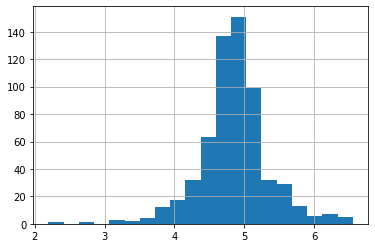

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

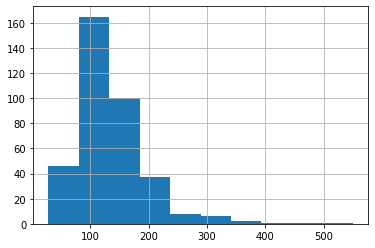

In [ ]:
test['LoanAmount'].hist()

In [ ]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

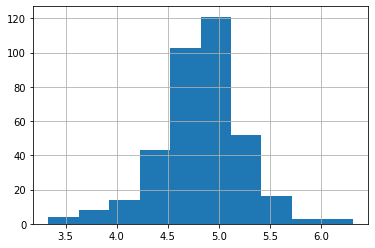

In [ ]:
test['LoanAmount_log'].hist()



*   Confusion matrix can be used to visualize the result of classification problem
*   True Positive - Predicted positive and actually positive
- True Negative - Predticted negative and actually negative
*   False Positive - Predicted True, but actually false
- False Negative - Predicted Negative but actually True





- Accuracy of model - (TP + TN) / (TP + TN + FP + FN)
- Precision - Correctness Achieved in true prediction ie TP out of predicted positive = (TP)/(TP + FP)

- Recall (Sensitivity) - Actual Observations which are predicted correctly = TP/(TP + FN)

- Specificity - MEasure of false class labeled correctly
= (TN)/(TN + FP)

**Receiver Operating Characteristic (ROC)** - summarize model performance by evaluating trade off between true positive rate (sensitivity) and false positive rate (1 - specificity)
-----------

**Area Under Curve (AUC)** referred as index of accuracy or concordance Index is perfect performance metrics for ROC Curve. Higher the AOC, better prediction power of the model

AUC measure the ability of model to correctly classify true positives and true negatives

In [ ]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [ ]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
x.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
dtype: object

In [ ]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
63,4945,0.0,128.0,360.0,0.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
441,7901,1833.0,180.0,360.0,1.0,5.192957,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
359,5167,3167.0,200.0,360.0,1.0,5.298317,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
367,5124,0.0,124.0,360.0,0.0,4.820282,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,3660,5064.0,187.0,360.0,1.0,5.231109,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
299,2014,2925.0,113.0,360.0,1.0,4.727388,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
193,3858,0.0,76.0,360.0,1.0,4.330733,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
598,9963,0.0,180.0,360.0,1.0,5.192957,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv = model.predict(x_cv)

In [ ]:
pred_cv

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_cv,pred_cv)

0.7837837837837838

means model has 80% accuracy

In [ ]:
pred_test = model.predict(test)

In [ ]:
submission =  pd.read_csv('sample_submission.csv')


In [ ]:
submission.shape

(367, 2)

In [ ]:
pred_test.shape

(367,)

In [ ]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [ ]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [ ]:
from sklearn.model_selection import StratifiedKFold

i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = x.iloc[train_index],x.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(test)
  pred=model.predict_proba(xvl)[:,1]



0 of kfold 5
accuracy_score 0.8048780487804879

1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7804878048780488

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7950819672131147


In [ ]:
train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [ ]:
#trying new features which are not already present in the data set

train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

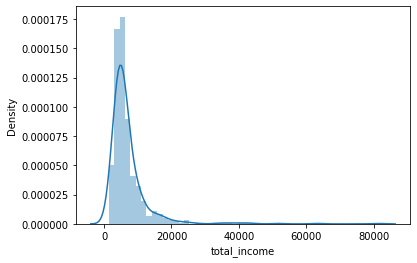

In [ ]:
sns.distplot(train['total_income'])

In [ ]:
train['total_income_log'] = np.log(train['total_income'])

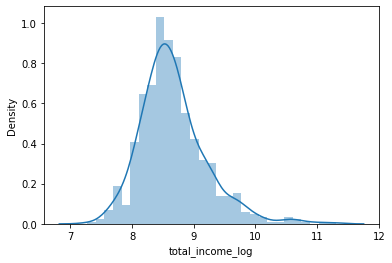

In [ ]:
sns.distplot(train['total_income_log'])

In [ ]:
test['total_income_log'] = np.log(test['total_income'])

In [ ]:
train['emi'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['emi'] = test['LoanAmount'] / test['Loan_Amount_Term'] 

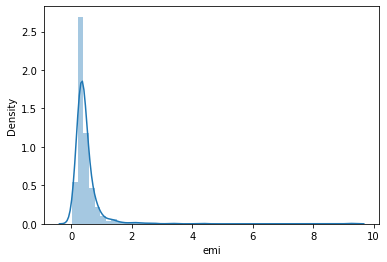

In [ ]:
sns.distplot(train['emi'])

In [ ]:
train['balanceincome'] = (train['total_income'] - train['emi']) * 1000
test['balanceincome'] = (test['total_income'] - test['emi']) * 1000

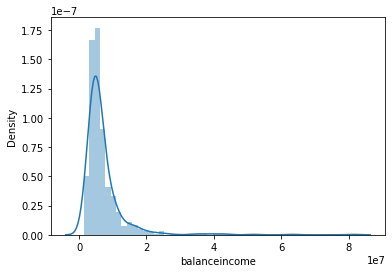

In [ ]:
sns.distplot(train['balanceincome'])

In [ ]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [ ]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'total_income', 'total_income_log', 'emi', 'balanceincome'],
      dtype='object')

In [ ]:
y = train['Loan_Status']
x = train.drop('Loan_Status',1)

**Trying different Algorithms**

In [ ]:
#starting with Logistic Regression
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = x.loc[train_index],x.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy score ', score)
  i+= 1
  pred_test = model.predict(test)
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score  0.6910569105691057

2 of kfold 5
accuracy score  0.6910569105691057

3 of kfold 5
accuracy score  0.6829268292682927

4 of kfold 5
accuracy score  0.6829268292682927

5 of kfold 5
accuracy score  0.6885245901639344
